In [26]:
''' DATA BRON CBS: https://opendata.cbs.nl/statline/#/CBS/nl/dataset/84363NED/table?ts=1572538836120'''
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()

nlvakanties = pd.read_csv("csv/cbs_vakantie.csv", sep = ';')
print(nlvakanties.dtypes)
nlvakanties.head(3)

Bestemming en seizoen                     object
Vakantiekenmerken                         object
Perioden                                  object
Deelname/Totaal Nederlanders (x 1 000)    object
Vakanties/Totaal (x 1 000)                object
Vakantiedagen/Totaal (mln )               object
Overnachtingen/Totaal (mln )              object
Uitgaven/Totaal (mln euro)                object
dtype: object


,Bestemming en seizoen,Vakantiekenmerken,Perioden,Deelname/Totaal Nederlanders (x 1 000),Vakanties/Totaal (x 1 000),Vakantiedagen/Totaal (mln ),Overnachtingen/Totaal (mln ),Uitgaven/Totaal (mln euro)
0,Totaal vakanties,Totaal vakanties,2017*,14084,41252,364.9,323.6,20637
1,Totaal vakanties,Totaal vakanties,2018*,14124,40854,366.9,326.1,21338
2,Totaal vakanties,"Accommodatie: hotel, pension, B&B",2017*,7642,14565,101.3,86.8,9900


In [27]:
'''DATA CLEANING - FROM OBJECTS NAAR INT'''

def float_cleaning(column_name):
    
    temp_2 = list(nlvakanties[column_name])
    pattern = '[0-9.]+|[.]'
    temp_3 = list(re.findall(pattern, str(temp_2)))
    temp_4 = [number.replace('.', '0') for number in temp_3]
    nlvakanties[column_name]= temp_4
    nlvakanties[column_name]= nlvakanties[column_name].astype('int')
    return nlvakanties

columns = ['Bestemming en seizoen', 'Vakantiekenmerken', 'Perioden','Deelname/Totaal Nederlanders (x 1 000)', 
           'Vakanties/Totaal (x 1 000)','Vakantiedagen/Totaal (mln )', 'Overnachtingen/Totaal (mln )',
           'Uitgaven/Totaal (mln euro)']

nlvakanties = float_cleaning("Perioden")

for el in columns[3:5]:
    nlvakanties = float_cleaning(el)
    nlvakanties[el] = nlvakanties[el]*1000

for el in columns[5:8]:
    nlvakanties = float_cleaning(el)
    nlvakanties[el] = nlvakanties[el]*1000000

new_colums = ['Bestemming en seizoen', 'Vakantiekenmerken', 'Perioden','Deelname/Totaal Nederlanders', 
           'Vakanties/Totaal','Vakantiedagen/Totaal', 'Overnachtingen/Totaal','Uitgaven/Totaal']

nlvakanties.columns = new_colums
nlvakanties

,Bestemming en seizoen,Vakantiekenmerken,Perioden,Deelname/Totaal Nederlanders,Vakanties/Totaal,Vakantiedagen/Totaal,Overnachtingen/Totaal,Uitgaven/Totaal
0,Totaal vakanties,Totaal vakanties,2017,14084000,41252000,36409000000,32306000000,20637000000
1,Totaal vakanties,Totaal vakanties,2018,14124000,40854000,36609000000,32601000000,21338000000
2,Totaal vakanties,"Accommodatie: hotel, pension, B&B",2017,7642000,14565000,10103000000,8608000000,9900000000
3,Totaal vakanties,"Accommodatie: hotel, pension, B&B",2018,7770000,14517000,10401000000,8906000000,10300000000
4,Totaal vakanties,"Accommodatie: vakantiehuis, stacaravan",2017,6341000,11740000,9808000000,8701000000,3555000000
...,...,...,...,...,...,...,...,...
375,Winterseizoen,Vervoerwijze: vliegtuig,2018,3303000,4381000,5106000000,4702000000,4716000000
376,Winterseizoen,Vervoerwijze: trein,2017,665000,844000,305000000,207000000,218000000
377,Winterseizoen,Vervoerwijze: trein,2018,648000,825000,306000000,208000000,270000000
378,Winterseizoen,Vervoerwijze: overige,2017,718000,905000,601000000,502000000,291000000


In [77]:
''' REALTIE 1: Vervoer met Bestemming en seizoen'''

Vervoer_met_Bestemming_Seizoen= nlvakanties[nlvakanties.Vakantiekenmerken.str.match(pat = 'Ver[a-z]')]
Vervoer_met_Bestemming_Seizoen.head()

,Bestemming en seizoen,Vakantiekenmerken,Perioden,Deelname/Totaal Nederlanders (x 1 000),Vakanties/Totaal (x 1 000),Vakantiedagen/Totaal (mln ),Overnachtingen/Totaal (mln ),Uitgaven/Totaal (mln euro)
68,Totaal vakanties,Vervoerwijze: auto,2017,11152000,26920000,20809,18109,7795
69,Totaal vakanties,Vervoerwijze: auto,2018,11210000,26390000,20903,18209,8085
70,Totaal vakanties,Vervoerwijze: vliegtuig,2017,6351000,10114000,12505,11504,11203
71,Totaal vakanties,Vervoerwijze: vliegtuig,2018,6490000,10322000,12705,11702,11455
72,Totaal vakanties,Vervoerwijze: trein,2017,1223000,1742000,808,701,558


In [35]:
''' RELATIE 2: Functie om de realties tussen vervoer en vakantiekenmerk weer te geven'''

def pivot_regex (value, regex):
    reis_kenmerk = nlvakanties.pivot_table(values=[value],
                     index=['Vakantiekenmerken'],
                     columns=['Bestemming en seizoen'], 
                     aggfunc=np.sum)
    reis_kenmerk = reis_kenmerk.reset_index()
    return reis_kenmerk[reis_kenmerk.Vakantiekenmerken.str.match(pat = regex)]


# ER ZIJN 5 HOOFTTHEMAS NUMMERS EN 4 SUB VAKANTIE KENMERKEN IN CATEGORIEEN
thema_dict = {'MENSEN':'Deelname/Totaal Nederlanders', 
               'VAKANTIES':'Vakanties/Totaal',
               'VAKANIEDAGEN':'Vakantiedagen/Totaal',
               'NACHTEN':'Overnachtingen/Totaal',
               'KOSTEN':'Uitgaven/Totaal'}

# EN HET VERVOERSKEKENMERK ZIT OVERAL IN (Ver[a-z])
regex_dict = {'ACCOMODATIE':'Ver[a-z]|A[a-z]',
               'ORGANISTATIE': 'Ver[a-z]|Org[a-z]', 
               'SOORT': 'Ver[a-z]|Soo[a-z]', 
               'VAKANTIEDUUR':'Ver[a-z]|Va[a-z]'}

data_dict ={}
for key in thema_dict:
    for sleutel in regex_dict:
        print(key, sleutel)
        data_dict[key, sleutel] = pivot_regex(thema_dict[key], regex_dict[sleutel])

MENSEN ACCOMODATIE
MENSEN ORGANISTATIE
MENSEN SOORT
MENSEN VAKANTIEDUUR
VAKANTIES ACCOMODATIE
VAKANTIES ORGANISTATIE
VAKANTIES SOORT
VAKANTIES VAKANTIEDUUR
VAKANIEDAGEN ACCOMODATIE
VAKANIEDAGEN ORGANISTATIE
VAKANIEDAGEN SOORT
VAKANIEDAGEN VAKANTIEDUUR
NACHTEN ACCOMODATIE
NACHTEN ORGANISTATIE
NACHTEN SOORT
NACHTEN VAKANTIEDUUR
KOSTEN ACCOMODATIE
KOSTEN ORGANISTATIE
KOSTEN SOORT
KOSTEN VAKANTIEDUUR


In [32]:
'''PLOTTING PHASE'''

Vakantiekenmerken  \
Bestemming en seizoen                                         
29                           Vakantieduur: 16 of meer dagen   
30                       Vakantieduur: 2 tot 5 dagen (kort)   
31                     Vakantieduur: 5 of meer dagen (lang)   
32                              Vakantieduur: 5 tot 9 dagen   
33                             Vakantieduur: 9 tot 16 dagen   
34                                       Vervoerwijze: auto   
35                                   Vervoerwijze: overige    
36                                      Vervoerwijze: trein   
37                                  Vervoerwijze: vliegtuig   

                      Deelname/Totaal Nederlanders  \
Bestemming en seizoen             Totaal vakanties   
29                                         9756000   
30                                        15063000   
31                                        25883000   
32                                        16355000   
33                                        12026000   
34                                        22362000   
35                                         3313000   
36                                         2444000   
37                                        12841000   

                                                     \
Bestemming en seizoen Vakantiebestemming: Nederland   
29                                          1800000   
30                                         11330000   
31                                         10824000   
32                                          8336000   
33                                          2692000   
34                                         16194000   
35                                          1530000   
36                                          1528000   
37                                                0   

                                                                    \
Bestemming en seizoen Vakantiebestemming: buitenland Winterseizoen   
29                                           8179000       2304000   
30                                           6402000      10419000   
31                                          20595000      12953000   
32                                          10188000       8808000   
33                                           9882000       4072000   
34                                          12828000      13589000   
35                                           2057000       1374000   
36                                           1077000       1313000   
37                                          12841000       6807000   

                                    
Bestemming en seizoen Zomerseizoen  
29                         8298000  
30                         9125000  
31                        23265000  
32                        11028000  
33                         9344000  
34                        18711000  
35                         2311000  
36                         1419000  
37                         9353000

In [89]:
MENSEN_VAKANTIEDUUR = data_dict['MENSEN', 'VAKANTIEDUUR']
MENSEN_VAKANTIEDUUR = MENSEN_VAKANTIEDUUR.set_index(MENSEN_VAKANTIEDUUR.Vakantiekenmerken)["Deelname/Totaal Nederlanders"]
MENSEN_VAKANTIEDUUR = MENSEN_VAKANTIEDUUR.T.reset_index()
MENSEN_VAKANTIEDUUR.Col = ['Bestemming en seizoen', '16+','2-5','5+','5-9','9-16','Car', 'Other', 'Train','Airplane']
MENSEN_VAKANTIEDUUR.columns = MENSEN_VAKANTIEDUUR.Col

cols = MENSEN_VAKANTIEDUUR.columns.tolist()
cols = cols[0:1] + cols[2:3] + cols[4:6] + cols[3:4] + cols[1:2] +  cols[6:7]+cols[9:10] + cols[8:9] + cols[7:8]
MENSEN_VAKANTIEDUUR = MENSEN_VAKANTIEDUUR[cols]
MENSEN_VAKANTIEDUUR.head(2)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Bestemming en seizoen,2-5,5-9,9-16,5+,16+,Car,Airplane,Train,Other
0,Totaal vakanties,15063000,16355000,12026000,25883000,9756000,22362000,12841000,2444000,3313000
1,Vakantiebestemming: Nederland,11330000,8336000,2692000,10824000,1800000,16194000,0,1528000,1530000


In [90]:
MENSEN_VAKANTIEDUUR.iplot(kind='bar', 
           x='Bestemming en seizoen', 
           xTitle='Travel time and transport choice', 
           yTitle='amound of days and people', 
           title='Holliday days and transport choice')

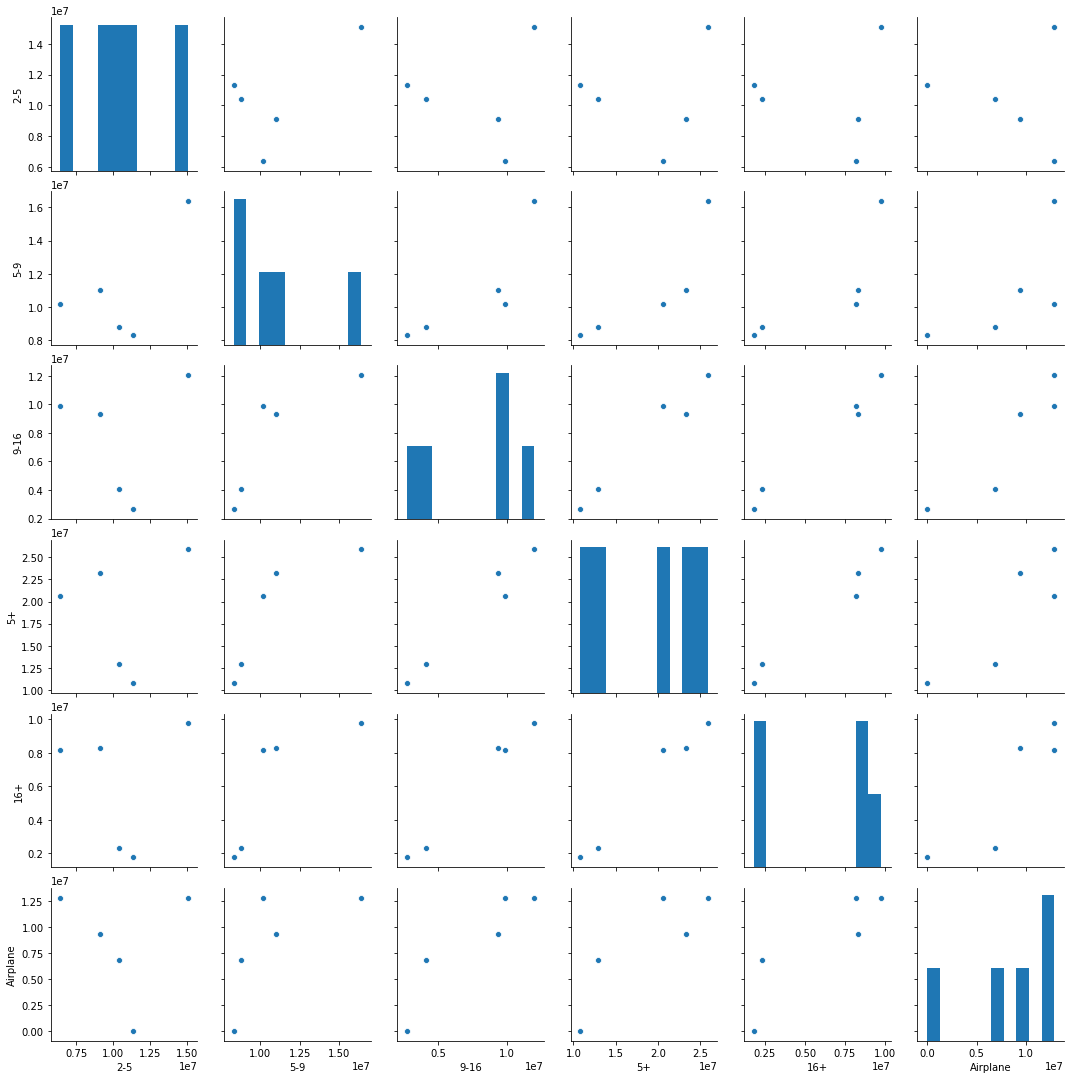

In [92]:
vliegen_vakantieduur = MENSEN_VAKANTIEDUUR[['2-5','5-9','9-16','5+','16+','Airplane']]
sns.pairplot(vliegen_vakantieduur)

In [95]:
vliegen_vakantieduur.corr()[5:6]

,2-5,5-9,9-16,5+,16+,Airplane
Airplane,-0.090235,0.673583,0.916249,0.861208,0.879404,1.0


In [102]:
MENSEN_VAKANTIEDUUR.index = MENSEN_VAKANTIEDUUR["Bestemming en seizoen"]
MENSEN_VAKANTIEDUUR
heatmap = MENSEN_VAKANTIEDUUR[['2-5', '5-9','9-16','5+','16+','Car','Airplane','Train','Other']]
heatmap

,2-5,5-9,9-16,5+,16+,Car,Airplane,Train,Other
Bestemming en seizoen,,,,,,,,,
Totaal vakanties,15063000,16355000,12026000,25883000,9756000,22362000,12841000,2444000,3313000
Vakantiebestemming: Nederland,11330000,8336000,2692000,10824000,1800000,16194000,0,1528000,1530000
Vakantiebestemming: buitenland,6402000,10188000,9882000,20595000,8179000,12828000,12841000,1077000,2057000
Winterseizoen,10419000,8808000,4072000,12953000,2304000,13589000,6807000,1313000,1374000
Zomerseizoen,9125000,11028000,9344000,23265000,8298000,18711000,9353000,1419000,2311000


In [104]:
heatmap.iplot(kind='heatmap', 
           colorscale='YlOrRd', 
           #xTitle='Tenure', 
           #yTitle='Month Level', 
           #title='Avg. Churn Rates by Month Level & Tenure')
             )

In [ ]:
'''
REMARCS CONCEDERING CLUSTERED DATA ANALYSIS 
https://largescaleassessmentsineducation.springeropen.com/articles/10.1186/2196-0739-1-7

'''